# Performance Analysis
Using synthetic audio signal generation process a driver for examining perfromance.
Starting with initial slow implementation, we update the method to improve pefromance while keeping the same output.

In [1]:
# Load Extensions

# cpu line profiler
%load_ext line_profiler
# memory profiler
%load_ext memory_profiler
# Cython support
%load_ext Cython

# Reload modules before executing user code
%load_ext autoreload
%autoreload 2

# setup backend for matplotlibs plots
%matplotlib inline

In [2]:
# Imports
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

import math
import random

In [3]:
# set random seed for reproducibility
np.random.seed(1)
random.seed(1)

# time in seconds
sample_time = 60*60 
# samples in a second
samples_per_second = 1000

In [4]:
# Quick data view
def graph(data,seconds):
    fig,axes=plt.subplots()
    plt.plot(data[0], data[1])
    plt.xlim(0, seconds)
    plt.ylim(-3, 3)
    plt.xlabel('time')
    plt.ylabel('signal')
    plt.grid(True)
    plt.show()

### Slow Implementation

In [5]:
# Really slow generation of synthetic data
def reallySlowGenerateTimeSeriesData(seconds,samples_per_second):
    """Generate synthetic data"""
    
    time = []
    signal = []   
    
    # generate signal
    sample_time = 0
    for s in range(seconds):        
        for sps in range(samples_per_second):
            sample_time += 1/samples_per_second
            noise = random.random()
            scaled_noise = -1 + (noise * 2)
            sample = math.sin(2*math.pi*10*sample_time) + scaled_noise
            time.append(sample_time)
            signal.append(sample)
    
    # return time and signal
    return [time,signal]

In [6]:
%lprun -f reallySlowGenerateTimeSeriesData data1 = reallySlowGenerateTimeSeriesData(sample_time,samples_per_second)

Timer unit: 1e-06 s

Total time: 14.249 s
File: <ipython-input-5-ad467de0be46>
Function: reallySlowGenerateTimeSeriesData at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def reallySlowGenerateTimeSeriesData(seconds,samples_per_second):
     3                                               """Generate synthetic data"""
     4                                               
     5         1          4.0      4.0      0.0      time = []
     6         1          0.0      0.0      0.0      signal = []   
     7                                               
     8                                               # generate signal
     9         1          0.0      0.0      0.0      sample_time = 0
    10      3601       1846.0      0.5      0.0      for s in range(seconds):        
    11   3603600    1599081.0      0.4     11.2          for sps in range(samples_per_second):
    12   3600000    2043984.0      0.6     14.

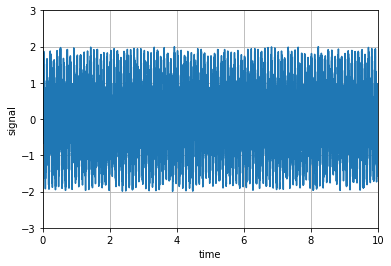

In [7]:
graph(data1,10)

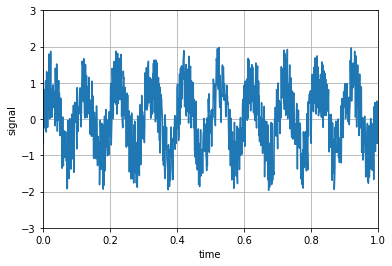

In [8]:
graph(data1,1)

### A bit faster NumPy implementation

In [9]:
# Try removing one of the for loops
def slightlyFasterGenerateTimeSeriesData(seconds,samples_per_second):
    """Generate synthetic data"""
    
    # generate time 
    time = np.arange(0,seconds,1/samples_per_second)
    
    # generate signal
    signal = []
    for t in time:   
        noise = random.random()
        scaled_noise = -1 + (noise * 2)
        sample = math.sin(2*math.pi*10*t) + scaled_noise            
        signal.append(sample)
    
    # return time and signal
    return [time,signal]

In [10]:
%lprun -f slightlyFasterGenerateTimeSeriesData data2 = slightlyFasterGenerateTimeSeriesData(sample_time,samples_per_second)

Timer unit: 1e-06 s

Total time: 10.3992 s
File: <ipython-input-9-22da55d64d90>
Function: slightlyFasterGenerateTimeSeriesData at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def slightlyFasterGenerateTimeSeriesData(seconds,samples_per_second):
     3                                               """Generate synthetic data"""
     4                                               
     5                                               # generate time 
     6         1       6937.0   6937.0      0.1      time = np.arange(0,seconds,1/samples_per_second)
     7                                               
     8                                               # generate signal
     9         1          2.0      2.0      0.0      signal = []
    10   3600001    1713322.0      0.5     16.5      for t in time:   
    11   3600000    1854798.0      0.5     17.8          noise = random.random()
    12   3600000    1820150.0

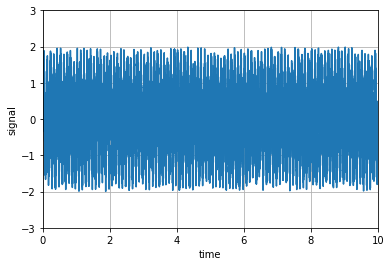

In [11]:
graph(data2,10)

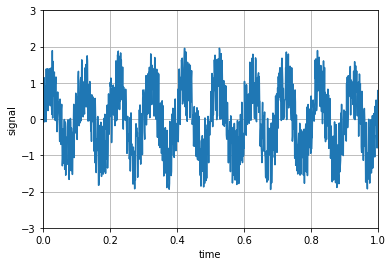

In [12]:
graph(data2,1)

### Fast NumPy Implementation

In [13]:
# replace python math lib with numpy, process the whole array of data instead of a row by row
def reallyFastGenerateTimeSeriesData(seconds,samples_per_second):
    """Generate synthetic data"""
    
    # generate time
    time = np.arange(0,seconds,1/samples_per_second)
    
    # generate signal
    noise = -2 * np.random.random(len(time)) + 1
    signal = np.sin(2*np.pi*10*time) + noise
    
    # return time and signal
    return [time,signal]

In [14]:
%lprun -f reallyFastGenerateTimeSeriesData data3 = reallyFastGenerateTimeSeriesData(sample_time,samples_per_second)

Timer unit: 1e-06 s

Total time: 0.099993 s
File: <ipython-input-13-9d2d1eae4080>
Function: reallyFastGenerateTimeSeriesData at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def reallyFastGenerateTimeSeriesData(seconds,samples_per_second):
     3                                               """Generate synthetic data"""
     4                                               
     5                                               # generate time
     6         1       4072.0   4072.0      4.1      time = np.arange(0,seconds,1/samples_per_second)
     7                                               
     8                                               # generate signal
     9         1      64812.0  64812.0     64.8      noise = -2 * np.random.random(len(time)) + 1
    10         1      31106.0  31106.0     31.1      signal = np.sin(2*np.pi*10*time) + noise
    11                                               
    12 

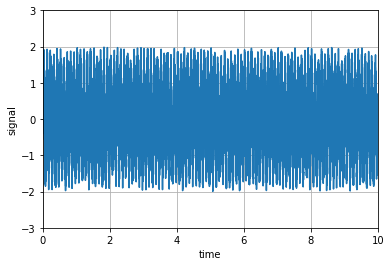

In [15]:
graph(data3,10)

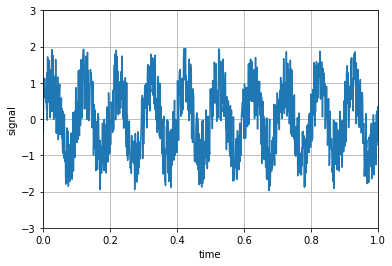

In [16]:
graph(data3,1)

### Slow pandas implementation

In [17]:
import math
import random

def pandasReallySlowGenerateTimeSeriesData(seconds,samples_per_second):
    """Generate synthetic data"""
    
    # generate time
    time = np.arange(0,seconds,1/samples_per_second)
    
    # create pandas
    df = pd.DataFrame(data=time, columns=['time'])
    
    def generateSignal(t):
        noise = random.random()
        scaled_noise = -1 + (noise * 2)
        return math.sin(2*math.pi*10*t) + scaled_noise 
    
    # generate signal
    df['signal'] = df['time'].apply(lambda t: generateSignal(t))
       
    # return time and signal
    return [df['time'],df['signal']]

In [18]:
%lprun -f pandasReallySlowGenerateTimeSeriesData data4 = pandasReallySlowGenerateTimeSeriesData(sample_time,samples_per_second)

Timer unit: 1e-06 s

Total time: 5.46268 s
File: <ipython-input-17-db55a8d6caa7>
Function: pandasReallySlowGenerateTimeSeriesData at line 4

Line #      Hits         Time  Per Hit   % Time  Line Contents
     4                                           def pandasReallySlowGenerateTimeSeriesData(seconds,samples_per_second):
     5                                               """Generate synthetic data"""
     6                                               
     7                                               # generate time
     8         1       5712.0   5712.0      0.1      time = np.arange(0,seconds,1/samples_per_second)
     9                                               
    10                                               # create pandas
    11         1        745.0    745.0      0.0      df = pd.DataFrame(data=time, columns=['time'])
    12                                               
    13         1          2.0      2.0      0.0      def generateSignal(t):
    14        

In [19]:
graph(data4,10)

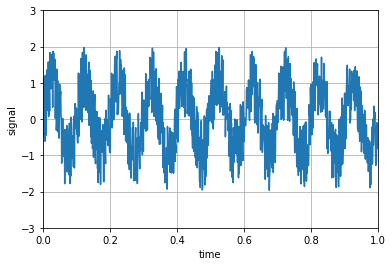

In [20]:
graph(data4,1)

### Fast pandas implementation

In [21]:
def pandasFasterSlowGenerateTimeSeriesData(seconds,samples_per_second):
    """Generate synthetic data"""
    
    # generate time
    time = np.arange(0,seconds,1/samples_per_second)
    
    # create pandas
    df = pd.DataFrame(data=time, columns=['time'])
    
    def generateSignal(t):
        noise = -2 * np.random.random(len(t)) + 1
        return np.sin(2*np.pi*10*t) + noise
    
    # generate signal
    df['signal'] = generateSignal(df['time'])
       
    # return time and signal
    return [df['time'],df['signal']]

In [22]:
%lprun -f pandasFasterSlowGenerateTimeSeriesData data5 = pandasFasterSlowGenerateTimeSeriesData(sample_time,samples_per_second)

Timer unit: 1e-06 s

Total time: 0.122693 s
File: <ipython-input-21-af6b0f3471c8>
Function: pandasFasterSlowGenerateTimeSeriesData at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def pandasFasterSlowGenerateTimeSeriesData(seconds,samples_per_second):
     2                                               """Generate synthetic data"""
     3                                               
     4                                               # generate time
     5         1      15884.0  15884.0     12.9      time = np.arange(0,seconds,1/samples_per_second)
     6                                               
     7                                               # create pandas
     8         1        582.0    582.0      0.5      df = pd.DataFrame(data=time, columns=['time'])
     9                                               
    10         1          2.0      2.0      0.0      def generateSignal(t):
    11       

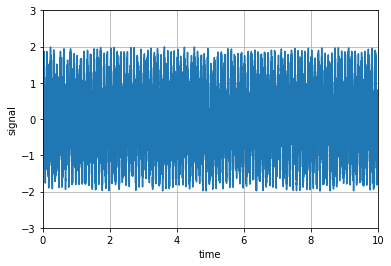

In [23]:
graph(data5,10)

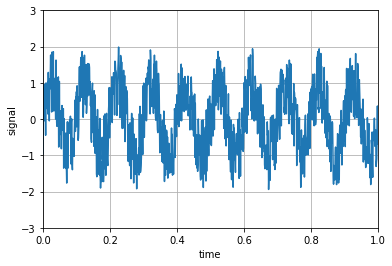

In [24]:
graph(data5,1)

### Fast Numpy and pandas implementation

In [25]:
def pandasNumpyFastSlowGenerateTimeSeriesData(seconds,samples_per_second):
    """Generate synthetic data"""
    
    # generate time
    time = np.arange(0,seconds,1/samples_per_second)
    
    # create pandas
    df = pd.DataFrame(data=time, columns=['time'])
    
    def generateSignal(t):
        noise = -2 * np.random.random(len(t)) + 1
        return np.sin(2*np.pi*10*t) + noise
    
    # generate signal
    df['signal'] = generateSignal(df['time'].values)
       
    # return time and signal
    return [df['time'],df['signal']]

In [26]:
%lprun -f pandasNumpyFastSlowGenerateTimeSeriesData data6 = pandasNumpyFastSlowGenerateTimeSeriesData(sample_time,samples_per_second)

Timer unit: 1e-06 s

Total time: 0.109846 s
File: <ipython-input-25-308404be5931>
Function: pandasNumpyFastSlowGenerateTimeSeriesData at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def pandasNumpyFastSlowGenerateTimeSeriesData(seconds,samples_per_second):
     2                                               """Generate synthetic data"""
     3                                               
     4                                               # generate time
     5         1       5812.0   5812.0      5.3      time = np.arange(0,seconds,1/samples_per_second)
     6                                               
     7                                               # create pandas
     8         1        628.0    628.0      0.6      df = pd.DataFrame(data=time, columns=['time'])
     9                                               
    10         1          2.0      2.0      0.0      def generateSignal(t):
    11 

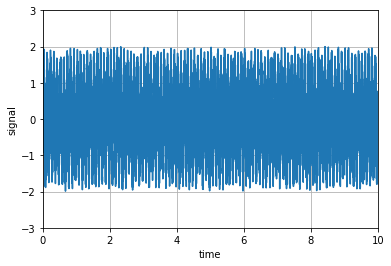

In [27]:
graph(data6,10)

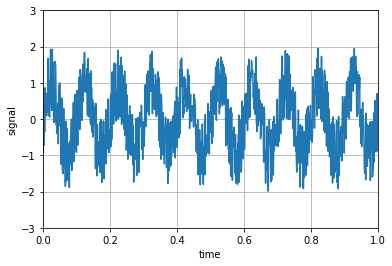

In [28]:
graph(data6,1)

In [29]:
# Sanity check
print("Data1[0]: {}, Data1[1]: {}".format(len(data1[0]),len(data1[1])))
print("Data2[0]: {}, Data2[1]: {}".format(len(data2[0]),len(data2[1])))
print("Data3[0]: {}, Data3[1]: {}".format(len(data3[0]),len(data3[1])))
print("Data4[0]: {}, Data4[1]: {}".format(len(data4[0]),len(data4[1])))
print("Data5[0]: {}, Data5[1]: {}".format(len(data5[0]),len(data5[1])))
print("Data6[0]: {}, Data6[1]: {}".format(len(data6[0]),len(data6[1])))

Data1[0]: 3600000, Data1[1]: 3600000
Data2[0]: 3600000, Data2[1]: 3600000
Data3[0]: 3600000, Data3[1]: 3600000
Data4[0]: 3600000, Data4[1]: 3600000
Data5[0]: 3600000, Data5[1]: 3600000
Data6[0]: 3600000, Data6[1]: 3600000


## Refactoring methods

In [30]:
# Generate synthetic signal - TODO: improve random
def generateSignal(time):
    """Generate synthetic data"""
    noise = -2 * np.random.random(len(time)) + 1
    return np.sin(2*np.pi*10*time) + noise

In [31]:
# generate time
def generateTime(seconds,samples_per_second):
    """Generate time data"""
    return np.arange(0,seconds,1/samples_per_second)

In [32]:
def processTimeSeriesData(seconds,samples_per_second):
    """Process data"""
    
    # create pandas - init with time
    df = pd.DataFrame(data=generateTime(seconds,samples_per_second), columns=['time'])
    
    # generate signal
    df['signal'] = generateSignal(df['time'].values)
       
    # return data frame with signal
    return df

In [33]:
%lprun -f processTimeSeriesData dataFrame = processTimeSeriesData(sample_time,samples_per_second)

Timer unit: 1e-06 s

Total time: 0.096477 s
File: <ipython-input-32-be1b6a72b0b3>
Function: processTimeSeriesData at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def processTimeSeriesData(seconds,samples_per_second):
     2                                               """Process data"""
     3                                               
     4                                               # create pandas - init with time
     5         1       7335.0   7335.0      7.6      df = pd.DataFrame(data=generateTime(seconds,samples_per_second), columns=['time'])
     6                                               
     7                                               # generate signal
     8         1      89139.0  89139.0     92.4      df['signal'] = generateSignal(df['time'].values)
     9                                                  
    10                                               # return data frame wit

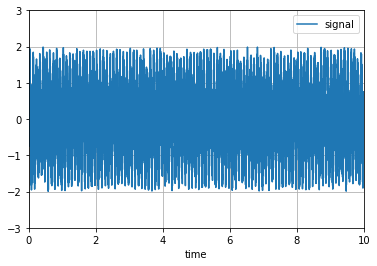

In [34]:
ax = dataFrame.plot(kind='line',x='time',y='signal',xlim=(0,10),ylim=(-3,3),grid=True)

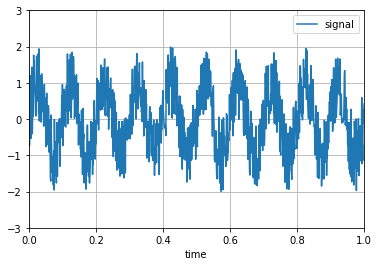

In [35]:
ax = dataFrame.plot(kind='line',x='time',y='signal',xlim=(0,1),ylim=(-3,3),grid=True)

## Visulizing Data
This time series data has no information, it is just noise.

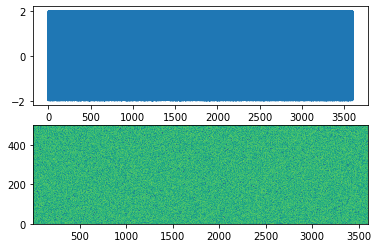

In [36]:
# Let's see how the signal looks in frequency domain
fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(dataFrame['time'], dataFrame['signal'])
im = ax2.specgram(dataFrame['signal'], NFFT=sample_time, Fs=samples_per_second, noverlap=900)
plt.show()

### Add info into the data

In [37]:
# add info into the signal - Add C Note at 261.63Hz
def addTones(time,signal):
    new_signal = np.copy(signal)
    new_signal[(time >= 29*60) & (time <= 31*60)] = np.sin(2*np.pi*261.63*time[(time >= 29*60) & (time <= 31*60)])
    return new_signal
    
dataFrame['signal_new'] =  addTones(dataFrame['time'].values,dataFrame['signal'].values)

In [38]:
fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(dataFrame['time'], dataFrame['signal_new'])
im = ax2.specgram(dataFrame['signal_new'], NFFT=sample_time, Fs=samples_per_second, noverlap=900)
plt.show()

In [39]:
ax = dataFrame.plot(kind='line',x='time',y='signal_new',xlim=(28*60,32*60),ylim=(-3,3),grid=True)

In [41]:
from IPython.display import Audio
Audio(dataFrame[(dataFrame.time <= 29.02*60) & (dataFrame.time >= 28.98*60)]['signal_new'],rate=samples_per_second)